# Demosaicing & High Dynamic Range - Exercise 2

## 1 Investigate Bayer Patterns

_Amin Amnollahi - Mahdi Darvish_

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import rawpy
from scipy.ndimage import convolve


%matplotlib inline

In [2]:
def apply_bayer_pattern(array, pattern_type='RGGB'):
    """
    Apply Bayer pattern and extract Y (green), C1 (red or blue), and C2 (blue or red).

    Parameters:
        array (ndarray): The input image array.
        pattern_type (str): Bayer pattern layout ('RGGB', 'BGGR', 'GRBG', or 'GBRG').

    Returns:
        tuple: Green (Y), red (C1), and blue (C2) channels.
    """
    red_channel = np.zeros_like(array)
    green_channel = np.zeros_like(array)
    blue_channel = np.zeros_like(array)

    if pattern_type == 'RGGB':
        green_channel[::2, ::2] = array[::2, ::2]  # Top-left green
        green_channel[1::2, 1::2] = array[1::2, 1::2]  # Bottom-right green
        red_channel[::2, 1::2] = array[::2, 1::2]  # Top-right red
        blue_channel[1::2, ::2] = array[1::2, ::2]  # Bottom-left blue
    elif pattern_type == 'BGGR':
        green_channel[0::2, 1::2] = array[0::2, 1::2]  # Top-right green
        green_channel[1::2, 0::2] = array[1::2, 0::2]  # Bottom-left green
        red_channel[1::2, 1::2] = array[1::2, 1::2]  # Bottom-right red
        blue_channel[0::2, 0::2] = array[0::2, 0::2]  # Top-left blue
    elif pattern_type == 'GRBG':
        green_channel[::2, 1::2] = array[::2, 1::2]  # Top-right green
        green_channel[1::2, ::2] = array[1::2, ::2]  # Bottom-left green
        red_channel[::2, ::2] = array[::2, ::2]  # Top-left red
        blue_channel[1::2, 1::2] = array[1::2, 1::2]  # Bottom-right blue
    elif pattern_type == 'GBRG':
        green_channel[::2, ::2] = array[::2, ::2]  # Top-left green
        green_channel[1::2, 1::2] = array[1::2, 1::2]  # Bottom-right green
        red_channel[1::2, ::2] = array[1::2, ::2]  # Bottom-left red
        blue_channel[::2, 1::2] = array[::2, 1::2]  # Top-right blue
    else:
        raise ValueError(f"Unknown Bayer pattern type: {pattern_type}")

    return green_channel, red_channel, blue_channel




def crop_image_region(array, start_x, start_y, end_x, end_y):
    """
    Crops a subsection of the input array based on specified coordinates.

    Parameters:
        array (ndarray): The input image array.
        start_x (int): Starting x-coordinate (row index) of the crop.
        start_y (int): Starting y-coordinate (column index) of the crop.
        end_x (int): Ending x-coordinate (row index) of the crop.
        end_y (int): Ending y-coordinate (column index) of the crop.

    Returns:
        ndarray: Cropped subsection of the input array.
    """
    # Ensure coordinates are within bounds
    start_x = max(0, start_x)
    start_y = max(0, start_y)
    end_x = min(array.shape[0], end_x)
    end_y = min(array.shape[1], end_y)

    # Crop and return the region
    return array[start_x:end_x, start_y:end_y]

In [3]:
data_directory = './exercise_2_data'
image_num = '01'
image_name = 'IMG_9939.npy'


img_dir = os.path.join(data_directory, image_num, image_name)
array = np.load(img_dir)
print('Loaded array of size', array.shape)
print('The pens, from top to bottom, are red, green and blue')

Loaded array of size (4014, 6020)
The pens, from top to bottom, are red, green and blue


In [1]:
nbins = 20

array_flatten = array.reshape(1, -1)

n, bins = np.histogram(array_flatten, nbins, density=1)
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

plt.plot(pdfx, pdfy)

NameError: name 'array' is not defined

In [ ]:
green_mask = (array > 4500).astype(int)
red_blue_mask = (array <= 4500).astype(int)

plt.imshow(red_blue_mask)

In [2]:
%matplotlib qt

# Global variables to store selected region coordinates
start_x, start_y, end_x, end_y = 0, 0, 0, 0

# Callback function to capture the rectangle selection
def onselect(eclick, erelease):
    global start_x, start_y, end_x, end_y
    start_x, start_y = int(eclick.xdata), int(eclick.ydata)
    end_x, end_y = int(erelease.xdata), int(erelease.ydata)
    plt.close()  # Close the interactive plot after selection

# Function to interactively select a region
def interactive_select(image):
    global start_x, start_y, end_x, end_y

    # Plot the image and set up the RectangleSelector
    

    # Return selected coordinates
    return start_x, start_y, end_x, end_y


# Main workflow
# Show the original image and let the user select a region
%matplotlib qt

fig, ax = plt.subplots()
ax.imshow(array, cmap="gray")
rect_selector = RectangleSelector(ax, onselect, useblit=True,
                              button=[1],  # Only respond to left mouse button
                              minspanx=5, minspany=5,
                              interactive=True)
plt.title("Draw a rectangle to select a region")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
%matplotlib inline
print(f"Selected region: {start_x, start_y, end_x, end_y}")

# Generate Bayer pattern masks for the selected region
array_cropped = crop_image_region(array, start_x, start_y, end_x, end_y)
green_mask, red_mask, blue_mask = apply_bayer_pattern(array_cropped, pattern_type='RGGB')
    
# Display each mask
plt.figure(figsize=(6, 6))
plt.title("Green Channel Mask")
plt.imshow(green_mask, cmap="Greens")
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.title("Red Channel Mask")
plt.imshow(red_mask, cmap="Reds")
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.title("Blue Channel Mask")
plt.imshow(blue_mask, cmap="Blues")
plt.colorbar()
plt.show()

## 2 Show that Sensor Data is Linear

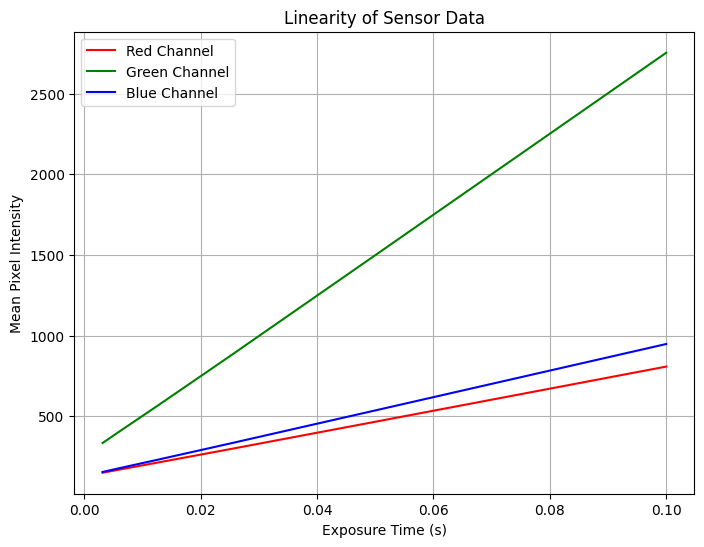

In [8]:
# Set the file path and exposure data
data_folder = './exercise_2_data/'
file_list = [
    "02/IMG_3044.CR3", "02/IMG_3045.CR3", "02/IMG_3046.CR3",
    "02/IMG_3047.CR3", "02/IMG_3048.CR3", "02/IMG_3049.CR3"
]
exposure_durations = np.array([0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125])

# Prepare lists to store the computed averages for each color channel
red_channel_means, green_channel_means, blue_channel_means = [], [], []

# Process each file in the dataset
for file_name in file_list:
    # Load the image and convert to a numpy array
    raw_image = rawpy.imread(data_folder + file_name)
    image_data = np.array(raw_image.raw_image_visible)
    
    # Extract color channel data using the Bayer pattern
    green_values, red_values, blue_values = apply_bayer_pattern(image_data, pattern_type='BGGR')
    
    # Compute the mean values for each channel and store them
    red_channel_means.append(np.mean(red_values))
    green_channel_means.append(np.mean(green_values))
    blue_channel_means.append(np.mean(blue_values))

# Generate the plot for sensor linearity
plt.figure(figsize=(8, 6))
plt.plot(exposure_durations, red_channel_means, 'r-', label='Red Channel')
plt.plot(exposure_durations, green_channel_means, 'g-', label='Green Channel')
plt.plot(exposure_durations, blue_channel_means, 'b-', label='Blue Channel')
plt.xlabel("Exposure Time (s)")
plt.ylabel("Mean Pixel Intensity")
plt.title("Linearity of Sensor Data")
plt.legend()
plt.grid(visible=True)
plt.show()


## 3 Implement a Demosaicing Algorithm

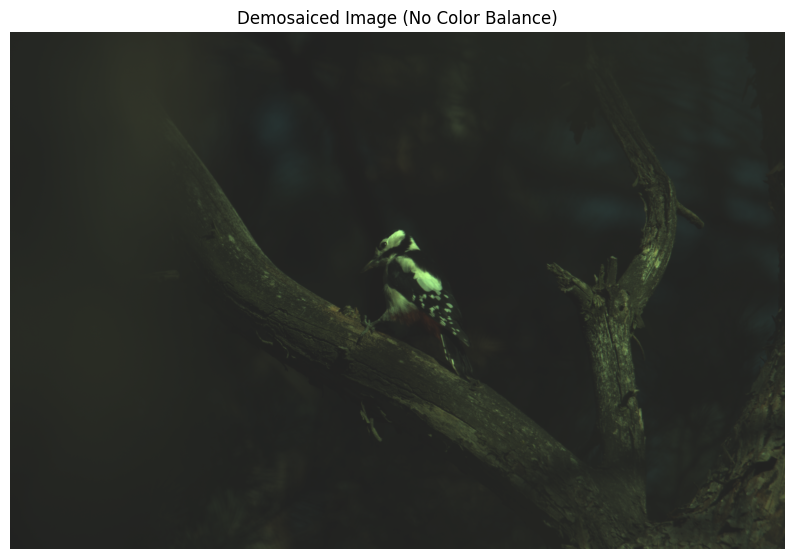

In [9]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def bilinear_interpolation(channel, kernel):
    """
    Perform bilinear interpolation on a single color channel.

    Parameters:
        channel (ndarray): The input 2D array for a color channel.
        kernel (ndarray): A convolution kernel for interpolation.

    Returns:
        ndarray: The interpolated 2D array for the channel.
    """
    return convolve(channel, kernel, mode='mirror')

def demosaic_bayer(array):
    """
    Perform simple bilinear demosaicing on a Bayer-patterned image.

    Parameters:
        array (ndarray): The input raw Bayer image.

    Returns:
        ndarray: The demosaiced image in RGB format.
    """
    # Define convolution kernels for bilinear interpolation
    green_kernel = np.array([[0, 1, 0],
                              [1, 4, 1],
                              [0, 1, 0]]) / 4
    red_blue_kernel = np.array([[1, 2, 1],
                                 [2, 4, 2],
                                 [1, 2, 1]]) / 4

    # Extract channels using the Bayer pattern
    green_channel, red_channel, blue_channel = apply_bayer_pattern(array, pattern_type='GRBG')

    # Interpolate missing values for each channel
    red_interp = bilinear_interpolation(red_channel, red_blue_kernel)
    green_interp = bilinear_interpolation(green_channel, green_kernel)
    blue_interp = bilinear_interpolation(blue_channel, red_blue_kernel)

    # Stack channels into an RGB image
    rgb_image = np.stack((red_interp, green_interp, blue_interp), axis=-1)

    return rgb_image

# Load the raw image data
data_path = "./exercise_2_data/03/IMG_4782.CR3"
raw = rawpy.imread(data_path)
raw_array = np.array(raw.raw_image_visible, dtype=np.float32)  # Retain original precision

# Apply the demosaicing algorithm
rgb_result = demosaic_bayer(raw_array)

# Visualize the result
plt.figure(figsize=(10, 10))
plt.title("Demosaiced Image (No Color Balance)")
plt.imshow(np.clip(rgb_result / np.max(rgb_result), 0, 1))  # Normalize for visualization
plt.axis('off')
plt.show()

# (Optional) Export the result as an image
output_image = (rgb_result / np.max(rgb_result) * 255).astype(np.uint8)


## 4 Improve the Luminosity

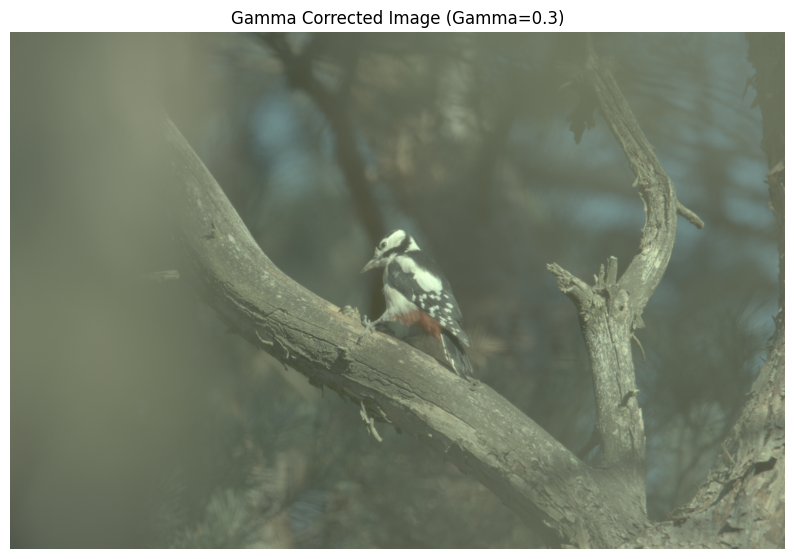

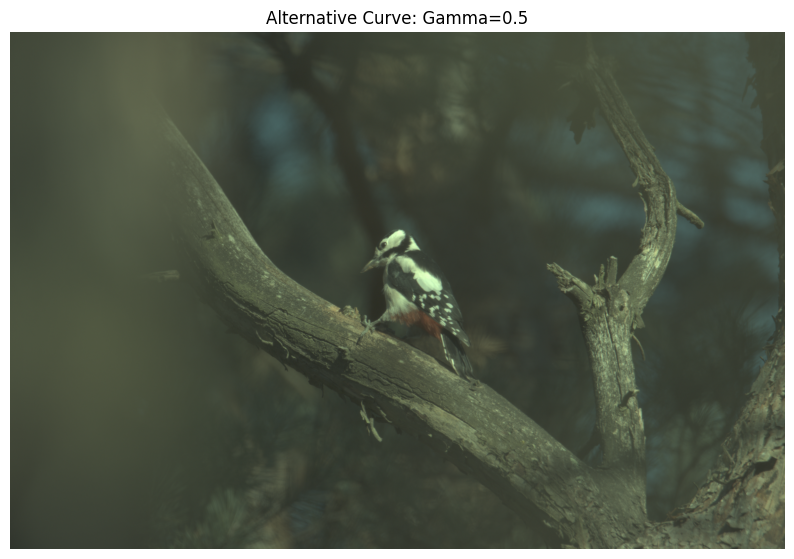

In [10]:
def normalize_image(data, lower_percentile=0.01, upper_percentile=99.99):
    """
    Normalize the image data using percentiles.

    Parameters:
        data (ndarray): Input image data.
        lower_percentile (float): Lower percentile for normalization.
        upper_percentile (float): Upper percentile for normalization.

    Returns:
        ndarray: Normalized image data in the range [0, 1].
    """
    a = np.percentile(data, lower_percentile)
    b = np.percentile(data, upper_percentile)
    normalized_data = (data - a) / (b - a)
    normalized_data[normalized_data < 0] = 0
    normalized_data[normalized_data > 1] = 1
    return normalized_data


def gamma_correction(data, gamma=0.3):
    """
    Apply gamma correction to image data.

    Parameters:
        data (ndarray): Normalized image data in the range [0, 1].
        gamma (float): Gamma value for correction.

    Returns:
        ndarray: Gamma-corrected image data.
    """
    return np.power(data, gamma)


def invert_normalization(data, original_min, original_max):
    """
    Restore the original range of the data after normalization and gamma correction.

    Parameters:
        data (ndarray): Image data after normalization and correction.
        original_min (float): Original minimum value of the data.
        original_max (float): Original maximum value of the data.

    Returns:
        ndarray: Data scaled back to the original range.
    """
    return data * (original_max - original_min) + original_min


# Apply the luminosity improvement steps
def improve_luminosity(image, gamma=0.3):
    """
    Improve the luminosity of an image using gamma correction and percentile normalization.

    Parameters:
        image (ndarray): The input image to process.
        gamma (float): Gamma value for correction.

    Returns:
        ndarray: Luminosity-improved image in the range [0, 255].
    """
    # Normalize the image using percentiles
    original_min, original_max = np.min(image), np.max(image)
    normalized_image = normalize_image(image)

    # Apply gamma correction
    gamma_corrected = gamma_correction(normalized_image, gamma)

    # Restore the range and scale to [0, 255]
    restored_image = invert_normalization(gamma_corrected, original_min, original_max)
    scaled_image = (restored_image / np.max(restored_image)) * 255  # Ensure [0, 255]

    return scaled_image.astype(np.uint8)


# Example usage
# Assume `rgb_result` is the demosaiced image from the previous step
gamma_value = 0.3
improved_image = improve_luminosity(rgb_result, gamma=gamma_value)

# Visualize the result
plt.figure(figsize=(10, 10))
plt.title(f"Gamma Corrected Image (Gamma={gamma_value})")
plt.imshow(np.clip(improved_image / np.max(improved_image), 0, 1))  # Normalize for display
plt.axis('off')
plt.show()

# Evaluate an alternative curve, such as y = sqrt(x)
alternative_curve_image = improve_luminosity(rgb_result, gamma=0.5)

plt.figure(figsize=(10, 10))
plt.title("Alternative Curve: Gamma=0.5")
plt.imshow(np.clip(alternative_curve_image / np.max(alternative_curve_image), 0, 1))
plt.axis('off')
plt.show()


## 5 White Balance

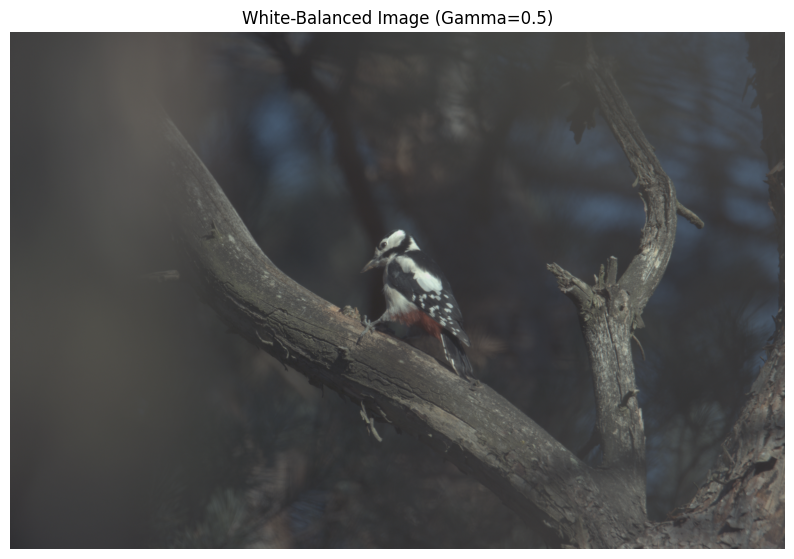

In [11]:
def white_balance(image):
    """
    Apply white balance using the Gray World Assumption.

    Parameters:
        image (ndarray): Input RGB image.

    Returns:
        ndarray: White-balanced image.
    """
    # Ensure the input is in float format for calculations
    image = image.astype(np.float64)

    # Compute the global mean intensity
    global_mean = np.mean(image)

    # Initialize the white-balanced image
    white_balanced_image = np.zeros_like(image, dtype=np.float64)

    # Process each channel
    for channel in range(3):
        channel_mean = np.mean(image[:, :, channel])
        white_balanced_image[:, :, channel] = image[:, :, channel] * (global_mean / channel_mean)

    # Clip values to the range [0, 255]
    white_balanced_image = np.clip(white_balanced_image, 0, 255)

    # Convert to uint8 type for display
    return white_balanced_image.astype(np.uint8)


# Apply white balance
white_balanced_image = white_balance(alternative_curve_image)

# Visualize the result
plt.figure(figsize=(10, 10))
plt.title("White-Balanced Image (Gamma=0.5)")
plt.imshow(np.clip(white_balanced_image / 255, 0, 1))  # Normalize for display
plt.axis('off')
plt.show()

## 6 Initial HDR Implementation

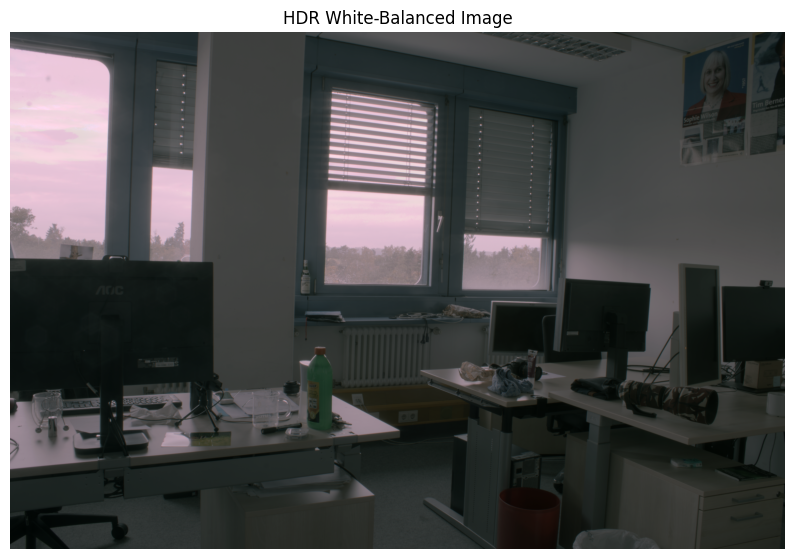

True

In [12]:
# Step 1: Function to read raw images
def read_raw_image(file_path):
    with rawpy.imread(file_path) as raw:
        return raw.raw_image_visible.copy()

# Step 2: HDR Combination Function
def hdr_combination(images, exposure_times):
    """
    Combine multiple LDR images into an HDR image using logarithmic scaling.

    Parameters:
        images (list): List of raw images as numpy arrays.
        exposure_times (list): Corresponding exposure times for each image.

    Returns:
        ndarray: The combined HDR image normalized to [0, 255].
    """
    h = images[0] / exposure_times[0]  # Base image normalized by its exposure time
    for i, img in enumerate(images[1:], start=1):
        # Scale the image using the exposure times
        scale_factor = exposure_times[0] / exposure_times[i]
        img_scaled = img * scale_factor

        # Integrate into HDR composite using a threshold
        threshold = 0.8 * h.max()
        h = np.where(img_scaled > threshold, img_scaled, h)

    # Apply logarithmic scaling to compress the dynamic range
    hdr_image_log = np.log1p(h)
    # Normalize to the range [0, 255]
    hdr_image_norm = 255 * (hdr_image_log - hdr_image_log.min()) / (hdr_image_log.max() - hdr_image_log.min())
    return hdr_image_norm.astype(np.uint8)

# Step 3: Demosaicing with Bilinear Interpolation
def bilinear_interpolation(channel, kernel):
    """
    Perform bilinear interpolation on a single color channel.

    Parameters:
        channel (ndarray): The input 2D array for a color channel.
        kernel (ndarray): A convolution kernel for interpolation.

    Returns:
        ndarray: The interpolated 2D array for the channel.
    """
    from scipy.ndimage import convolve
    return convolve(channel, kernel, mode='mirror')

def demosaic_bayer(array):
    """
    Perform simple bilinear demosaicing on a Bayer-patterned image.

    Parameters:
        array (ndarray): The input raw Bayer image.

    Returns:
        ndarray: The demosaiced image in RGB format.
    """
    # Define convolution kernels for bilinear interpolation
    green_kernel = np.array([[0, 1, 0],
                              [1, 4, 1],
                              [0, 1, 0]]) / 4
    red_blue_kernel = np.array([[1, 2, 1],
                                 [2, 4, 2],
                                 [1, 2, 1]]) / 4

    # Extract channels using the Bayer pattern
    green_channel, red_channel, blue_channel = apply_bayer_pattern(array, pattern_type='GRBG')

    # Interpolate missing values for each channel
    red_interp = bilinear_interpolation(red_channel, red_blue_kernel)
    green_interp = bilinear_interpolation(green_channel, green_kernel)
    blue_interp = bilinear_interpolation(blue_channel, red_blue_kernel)

    # Stack channels into an RGB image
    rgb_image = np.stack((red_interp, green_interp, blue_interp), axis=-1)

    return rgb_image

# Step 4: Apply HDR Combination and Demosaicing
image_paths = [
    "./exercise_2_data/06/00.CR3", "./exercise_2_data/06/01.CR3", "./exercise_2_data/06/02.CR3",
    "./exercise_2_data/06/03.CR3", "./exercise_2_data/06/04.CR3", "./exercise_2_data/06/05.CR3",
    "./exercise_2_data/06/06.CR3", "./exercise_2_data/06/07.CR3", "./exercise_2_data/06/08.CR3",
    "./exercise_2_data/06/09.CR3", "./exercise_2_data/06/10.CR3"
]
exposure_times_hdr = [1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256, 1/512, 1/1024]

# Read all images
images = [read_raw_image(file_path) for file_path in image_paths]

# Combine into HDR
hdr_image = hdr_combination(images, exposure_times_hdr)

# Apply demosaicing
hdr_demosaiced = demosaic_bayer(hdr_image)

# Step 5: Apply white balance
hdr_white_balanced_image = white_balance(hdr_demosaiced)

# Step 6: Visualize and Save
plt.figure(figsize=(10, 10))
plt.title("HDR White-Balanced Image")
plt.imshow(hdr_white_balanced_image / 255)  # Normalize for display
plt.axis("off")
plt.show()

# Save the HDR image
cv2.imwrite('hdr_image.png', cv2.cvtColor(hdr_white_balanced_image, cv2.COLOR_RGB2BGR))


## 7 iCAM06

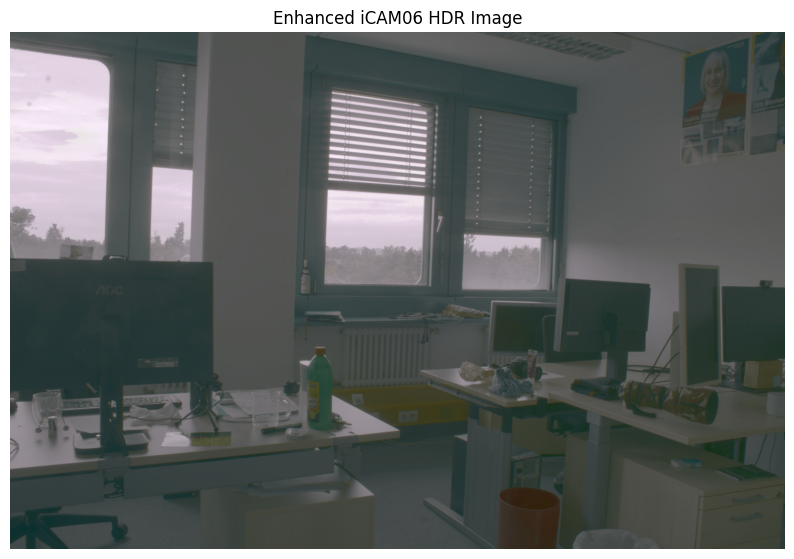

True

In [13]:
def iCAM06_improved(input_image, dynamic_range=4, detail_intensity=1.2, contrast_gamma=1.2, color_saturation=1.0):
    """
    Enhanced tone-mapping method for HDR images based on iCAM06.

    Parameters:
        input_image (ndarray): HDR input image in RGB format with float values in [0, 1].
        dynamic_range (float): Target dynamic range for tone mapping.
        detail_intensity (float): Amplification factor for the detail layer.
        contrast_gamma (float): Gamma correction factor for contrast enhancement.
        color_saturation (float): Saturation adjustment factor for chromaticity.

    Returns:
        ndarray: Tone-mapped image in RGB format with 8-bit values in [0, 255].
    """
    # Step 1: Calculate luminance
    luminance = (20 * input_image[..., 0] + 40 * input_image[..., 1] + input_image[..., 2]) / 61
    luminance[luminance == 0] = 1e-6  # Prevent division by zero

    # Step 2: Normalize RGB channels by luminance
    red_norm = input_image[..., 0] / luminance
    green_norm = input_image[..., 1] / luminance
    blue_norm = input_image[..., 2] / luminance

    # Step 3: Bilateral filter for luminance compression
    log_luminance = np.log(luminance + 1)  # Shift log scale to avoid log(0)
    smoothed_base = cv2.bilateralFilter(log_luminance.astype(np.float32), d=5, sigmaColor=75, sigmaSpace=75)
    detail_layer = (log_luminance - smoothed_base) * detail_intensity

    # Step 4: Dynamic range compression
    range_compression = np.log(dynamic_range) / (smoothed_base.max() - smoothed_base.min())
    base_offset = -smoothed_base.max() * range_compression
    tone_mapped_luminance = np.exp(smoothed_base * range_compression + base_offset + detail_layer)

    # Step 5: Adjust chromaticity saturation
    red_adjusted = np.clip(red_norm * color_saturation, 0, 1)
    green_adjusted = np.clip(green_norm * color_saturation, 0, 1)
    blue_adjusted = np.clip(blue_norm * color_saturation, 0, 1)

    # Step 6: Reconstruct the tone-mapped image
    red_final = red_adjusted * tone_mapped_luminance
    green_final = green_adjusted * tone_mapped_luminance
    blue_final = blue_adjusted * tone_mapped_luminance
    tone_mapped_image = np.stack((red_final, green_final, blue_final), axis=-1)

    # Step 7: Apply gamma correction for contrast improvement
    tone_mapped_image = np.clip(tone_mapped_image, 0, 1)  # Ensure all values are within [0, 1]
    tone_mapped_image = tone_mapped_image ** contrast_gamma

    # Step 8: Normalize and convert to 8-bit
    tone_mapped_image = np.clip(tone_mapped_image * 255, 0, 255).astype(np.uint8)

    return tone_mapped_image




# Apply the improved iCAM06 HDR Tone Mapping\
normalized_hdr = hdr_white_balanced_image / 255
icam06_enhanced_output = iCAM06_improved(normalized_hdr)

# Visualize the result
plt.figure(figsize=(10, 10))
plt.title("Enhanced iCAM06 HDR Image")
plt.imshow(icam06_enhanced_output / 255)  # Normalize for display
plt.axis("off")
plt.show()

# Save the result
cv2.imwrite("icam06_enhanced_output.png", cv2.cvtColor(icam06_enhanced_output, cv2.COLOR_RGB2BGR))


## 8 Win ?

In [14]:
def process_raw(input_path, output_path):
    """
    Process a CR3 raw file into an RGB image and save the result as a high-quality JPEG.

    Parameters:
        input_path (str): Path to the input CR3 raw file.
        output_path (str): Path to save the output JPEG file.
    """
    
    # Step 1: Read the raw image
    raw = rawpy.imread(input_path)
    raw_array = np.array(raw.raw_image_visible, dtype=np.float32)  # Retain original precision
    
    # Step 2: Demosaic the raw image
    demosaiced_image = demosaic_bayer(raw_array)

    # Step 3: Apply gamma correction (alternative curve, y = sqrt(x))
    curve_image = improve_luminosity(demosaiced_image, gamma=0.5)

    # Step 4: Apply white balance
    white_balanced_image = white_balance(curve_image)

    # Step 5: Convert to BGR for OpenCV and save as JPEG
    bgr_image = cv2.cvtColor(white_balanced_image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_path, bgr_image, [cv2.IMWRITE_JPEG_QUALITY, 99])

    print(f"Processed image saved as: {output_path}")


In [15]:
input_cr3  = "./exercise_2_data/03/IMG_4782.CR3"

output_jpg = "./example.jpg"

process_raw(input_cr3, output_jpg)


Processed image saved as: ./example.jpg
